# Section: Business Understanding
in following script will investigate , analyze and modeling listings.csv data set

Q1 :Can you predict the price from available futures?

Q2 :what's the relationship between scores cleanliness and scores rating?

Q3 :what's the highest property type in Seattle Airbnb?

Q4 :what's the distribution of amenities? what's on the top?

In [17]:
#import necessarily libraries and create data frame 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error



# Section: Data Understanding

# Gather

In [18]:
df = pd.read_csv('listings.csv')
pd.options.display.max_rows = 4000
#know size of dataframe
df.shape

(3818, 92)

 First, try to understand data from shape , data inside it and nulls values

In [3]:
#check data inside DF
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
#Check Data Type and Nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [5]:
#Check count of null  to detrmine way to fill it
df.isnull().sum().sort_values(ascending=False)

license                             3818
square_feet                         3721
monthly_price                       2301
security_deposit                    1952
weekly_price                        1809
notes                               1606
neighborhood_overview               1032
cleaning_fee                        1030
transit                              934
host_about                           859
host_acceptance_rate                 773
review_scores_accuracy               658
review_scores_checkin                658
review_scores_value                  656
review_scores_location               655
review_scores_cleanliness            653
review_scores_communication          651
review_scores_rating                 647
last_review                          627
first_review                         627
reviews_per_month                    627
space                                569
host_response_rate                   523
host_response_time                   523
neighbourhood   

#after checking data select main futures from my prespective

In [3]:
#select main futures in list
col_needed=['id','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price'
            ,'security_deposit','cleaning_fee','review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness',
             'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']

In [21]:
#create new DataFrame by main futures
df2=df[col_needed]
df2.head()

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,241032,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,NaN,NaN,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,953595,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$150.00,$100.00,$40.00,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,3308979,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$975.00,"$1,000.00",$300.00,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3,7421966,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",$100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,278830,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$450.00,$700.00,$125.00,92.0,9.0,9.0,10.0,10.0,9.0,9.0


In [8]:
#doble check data type and nulls to determine most proper way to fix it
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3818 non-null   int64  
 1   property_type                3817 non-null   object 
 2   room_type                    3818 non-null   object 
 3   accommodates                 3818 non-null   int64  
 4   bathrooms                    3802 non-null   float64
 5   bedrooms                     3812 non-null   float64
 6   beds                         3817 non-null   float64
 7   bed_type                     3818 non-null   object 
 8   amenities                    3818 non-null   object 
 9   price                        3818 non-null   object 
 10  security_deposit             1866 non-null   object 
 11  cleaning_fee                 2788 non-null   object 
 12  review_scores_rating         3171 non-null   float64
 13  review_scores_accu

# Section:Data Preparation
# Clean

second prepared data to use it

1- for object Kpis use mode to fill nun.

2- for object Kpis with special character remove it and convert to float.

3- for numeric kpis use mean or zero to fill nun.

4- for object Kpis with more than values in filed sprated values in difftent columns with values 0,1 if user have value in orginal data

5- for object Kpis use get_dummies to make dummies values .


In [29]:
df2['property_type'].fillna(df2['property_type'].mode()[0],inplace=True )
df2['bathrooms'].fillna(df2['bathrooms'].mean(),inplace=True)
df2['bedrooms'].fillna(df2['bedrooms'].mean(),inplace=True)
df2['beds'].fillna(df2['beds'].mean(),inplace=True)

In [23]:
df2 = pd.concat([df2.drop(columns = ['price']), df2['price'].str.replace('$','',regex=True).str.replace(',','',regex=True).astype(float)], axis = 1)
df2 = pd.concat([df2.drop(columns = ['security_deposit']), df2['security_deposit'].str.replace('$','',regex=True).str.replace(',','',regex=True).astype(float)], axis = 1)
df2['security_deposit'].fillna(0,inplace=True)
df2 = pd.concat([df2.drop(columns = ['cleaning_fee']), df2['cleaning_fee'].str.replace('$','',regex=True).str.replace(',','',regex=True).astype(float)], axis = 1)
df2['cleaning_fee'].fillna(0,inplace=True)

df2['review_scores_rating'].fillna(df2['review_scores_rating'].mean(),inplace=True)
df2['review_scores_accuracy'].fillna(df2['review_scores_accuracy'].mean(),inplace=True)
df2['review_scores_cleanliness'].fillna(df2['review_scores_cleanliness'].mean(),inplace=True)
df2['review_scores_checkin'].fillna(df2['review_scores_checkin'].mean(),inplace=True)
df2['review_scores_communication'].fillna(df2['review_scores_communication'].mean(),inplace=True)
df2['review_scores_location'].fillna(df2['review_scores_location'].mean(),inplace=True)
df2['review_scores_value'].fillna(df2['review_scores_value'].mean(),inplace=True)

amenities = df2['amenities']
amenities_list = []

for index, row in amenities.items():
    amenities_list.append(row.replace('{','').replace('}','').replace('"','').split(','))
    
amenities_df = pd.Series(amenities_list, name = 'amenities').to_frame()
dummies_amenities_df = amenities_df.drop('amenities', 1).join(
    pd.get_dummies(
        pd.DataFrame(amenities_df.amenities.tolist()).stack()
    ).astype(int).sum(level=0)
)

df2.drop('amenities','columns',inplace=True)
ML_DF = pd.concat([df2,dummies_amenities_df],axis=1)
ML_DF.head(3)


,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,review_scores_rating,review_scores_accuracy,...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,241032,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,95.0,10.0,...,0,0,0,0,0,1,1,0,0,1
1,953595,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,96.0,10.0,...,1,0,1,0,0,1,1,0,0,1
2,3308979,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,97.0,10.0,...,0,1,1,0,0,1,1,0,0,1


In [24]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in cat_cols:
        try:
            
            
            df=pd.concat([df.drop(col,axis=1),pd.get_dummies(df[col],prefix=col,prefix_sep='_',drop_first=True,dummy_na=dummy_na)],axis=1)

        except:
            continue
    return df


In [25]:
df_name=df2.select_dtypes(include=['object'])
ML_DF=create_dummy_df(ML_DF,df_name,dummy_na=False)
ML_DF.head()

,id,accommodates,bathrooms,bedrooms,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,...,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,241032,4,1.0,1.0,1.0,95.000000,10.000000,10.000000,10.000000,10.000000,...,0,0,0,0,0,0,0,0,0,1
1,953595,4,1.0,1.0,1.0,96.000000,10.000000,10.000000,10.000000,10.000000,...,0,0,0,0,0,0,0,0,0,1
2,3308979,11,4.5,5.0,7.0,97.000000,10.000000,10.000000,10.000000,10.000000,...,0,0,0,0,0,0,0,0,0,1
3,7421966,3,1.0,0.0,2.0,94.539262,9.636392,9.556398,9.786709,9.809599,...,0,0,0,0,0,0,0,0,0,1
4,278830,6,2.0,3.0,3.0,92.000000,9.000000,9.000000,10.000000,10.000000,...,0,0,0,0,0,0,0,0,0,1


In [26]:
#check new size
ML_DF.shape

(3818, 78)

In [27]:
#double checking ,there's not null values
ML_DF.isnull().sum().sort_values(ascending=False)

id                               0
Smoke Detector                   0
Wireless Internet                0
Wheelchair Accessible            0
Washer / Dryer                   0
Washer                           0
TV                               0
Suitable for Events              0
Smoking Allowed                  0
Shampoo                          0
property_type_Boat               0
Safety Card                      0
Pool                             0
Pets live on this property       0
Pets Allowed                     0
Other pet(s)                     0
Lock on Bedroom Door             0
Laptop Friendly Workspace        0
property_type_Bed & Breakfast    0
property_type_Bungalow           0
accommodates                     0
property_type_Townhouse          0
bed_type_Pull-out Sofa           0
bed_type_Futon                   0
bed_type_Couch                   0
room_type_Shared room            0
room_type_Private room           0
property_type_Yurt               0
property_type_Treeho

# Section:Data Modeling

# Q1:Can you predict the price from available futures?

In [28]:
# after use the selected futures the accuracy of preduction is 0.59
X = ML_DF[['accommodates', 'bathrooms', 'bedrooms', 'beds',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'security_deposit', 'cleaning_fee', '',
       '24-Hour Check-in', 'Air Conditioning', 'Breakfast',
       'Buzzer/Wireless Intercom', 'Cable TV', 'Carbon Monoxide Detector',
       'Cat(s)', 'Dog(s)', 'Doorman', 'Dryer', 'Elevator in Building',
       'Essentials', 'Family/Kid Friendly', 'Fire Extinguisher',
       'First Aid Kit', 'Free Parking on Premises', 'Gym', 'Hair Dryer',
       'Hangers', 'Heating', 'Hot Tub', 'Indoor Fireplace', 'Internet', 'Iron',
       'Kitchen', 'Laptop Friendly Workspace', 'Lock on Bedroom Door',
       'Other pet(s)', 'Pets Allowed', 'Pets live on this property', 'Pool',
       'Safety Card', 'Shampoo', 'Smoke Detector', 'Smoking Allowed',
       'Suitable for Events', 'TV', 'Washer', 'Washer / Dryer',
       'Wheelchair Accessible', 'Wireless Internet',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_House', 'property_type_Loft', 'property_type_Other',
       'property_type_Tent', 'property_type_Townhouse',
       'property_type_Treehouse', 'property_type_Yurt',
       'room_type_Private room', 'room_type_Shared room', 'bed_type_Couch',
       'bed_type_Futon', 'bed_type_Pull-out Sofa', 'bed_type_Real Bed']]
y = ML_DF['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,random_state=42)
ML = LinearRegression(normalize=True)
ML.fit(X_train,y_train)

y_test_preds =ML.predict(X_test)
y_test_preds = ML.predict(X_test) 
r2_score(y_test, y_test_preds)

0.5994742680789898

answer for first question yes , and the accuracy is 0.59

# Section:Evaluate the Results

# 2-what's the relationship between scores cleanliness and scores rating?

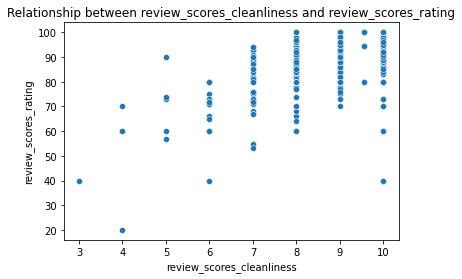

In [14]:
sns.scatterplot(data=ML_DF, x="review_scores_cleanliness", y="review_scores_rating");
plt.title("Relationship between review_scores_cleanliness and review_scores_rating")
plt.xlabel("review_scores_cleanliness")
plt.ylabel("review_scores_rating")
plt.show()


after check above figure , finding positive relationship two variables , that depends to each other.

# 3-what's the highest property type in Seattle Airbnb?

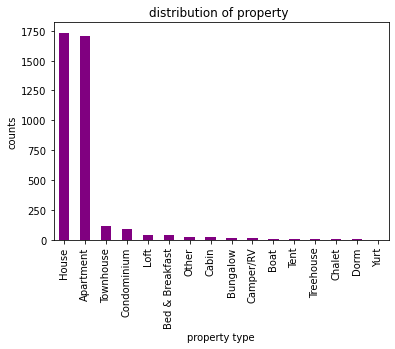

In [15]:
#Q2 House is the most property type in Seattle
df2.groupby('property_type')['id'].count().sort_values(ascending=False).plot(kind='bar',color='purple');
plt.title("distribution of property ")
plt.xlabel("property type")
plt.ylabel("counts")
plt.show()

there are two main types in the data set (House and Apartment)

# 4-what's the distribution of amenities? what's on the top?

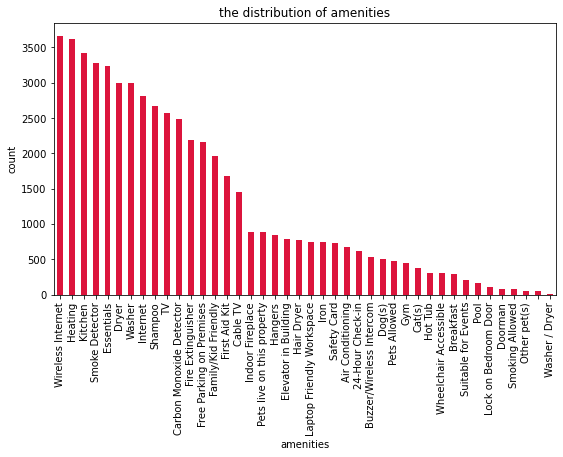

In [16]:
dummies_amenities_df.sum().sort_values(ascending=False).plot(kind='bar',figsize =(9,5),color='crimson');
plt.title('the distribution of amenities');
plt.ylabel('count')
plt.xlabel('amenities')
plt.show()


 as shown , the top amenities ia Wireless Internet